# ASSIGNMENT 7 - Basic Machine Learning
# NAME - Omkar Nitsure
# ROLL NO - 210070057

## Categorising the problems into different types and specifying their inputs and outputs

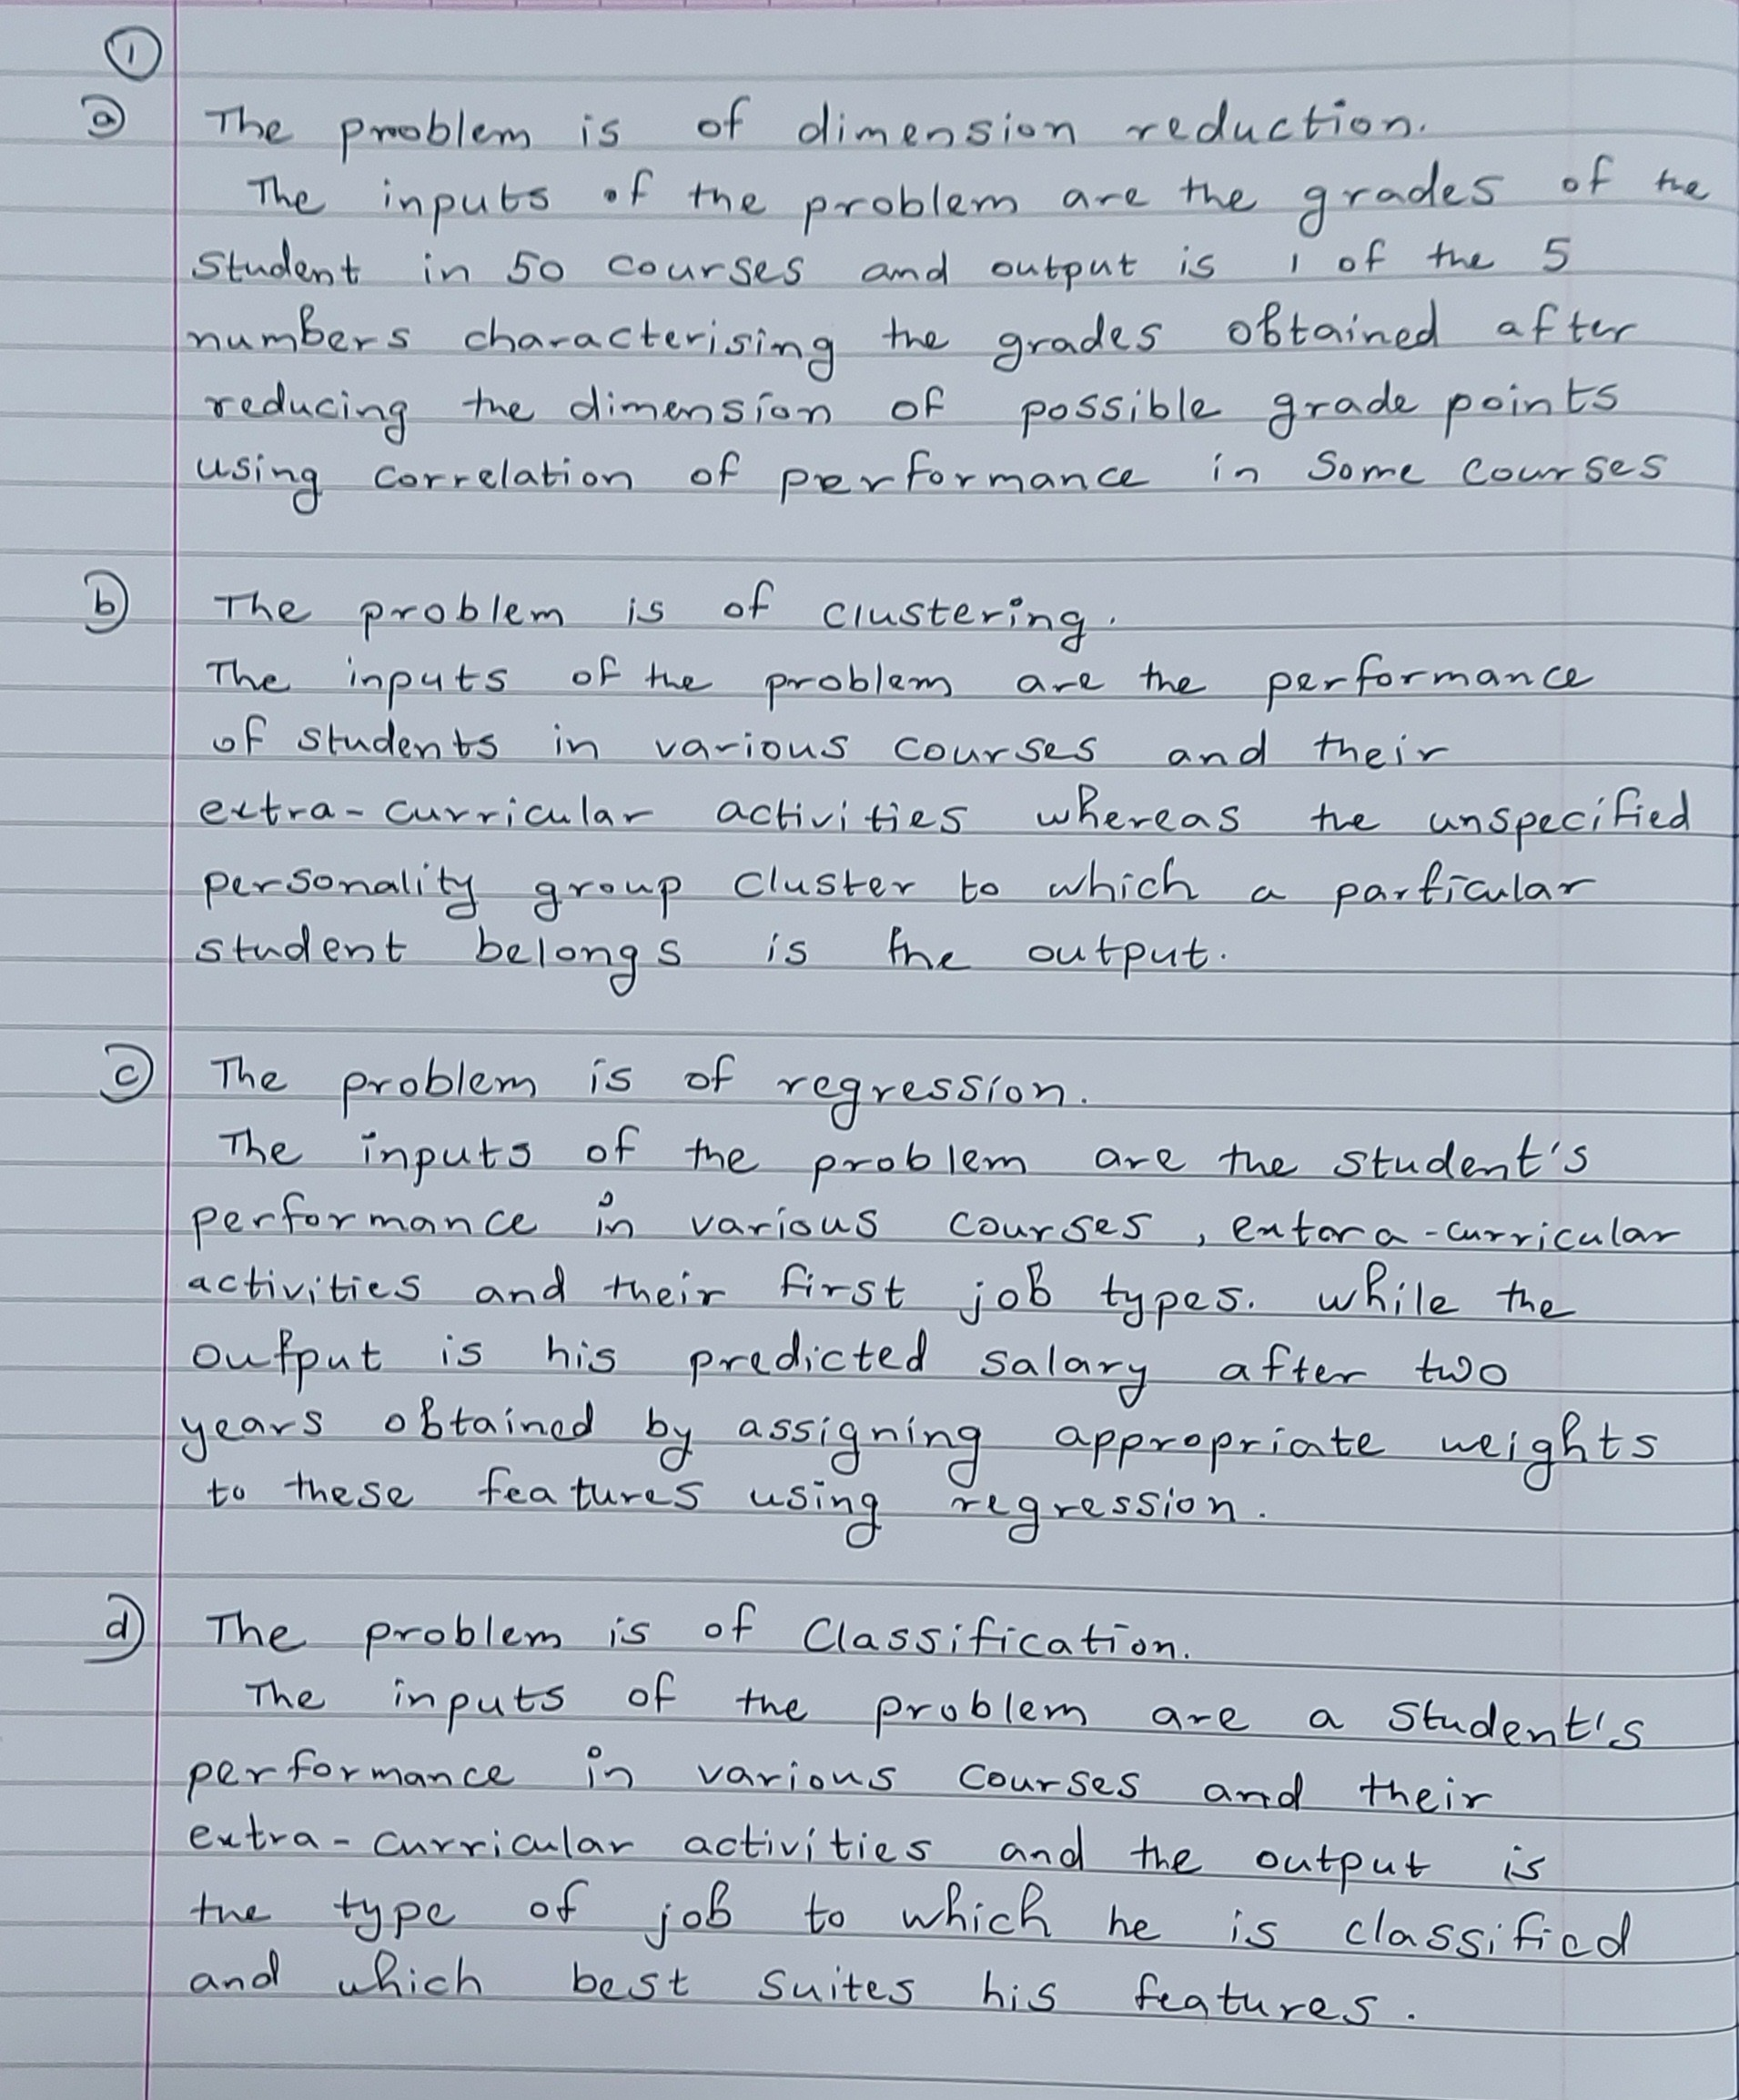

## Deciding the type of target variable to be predicted and the type of learning problem

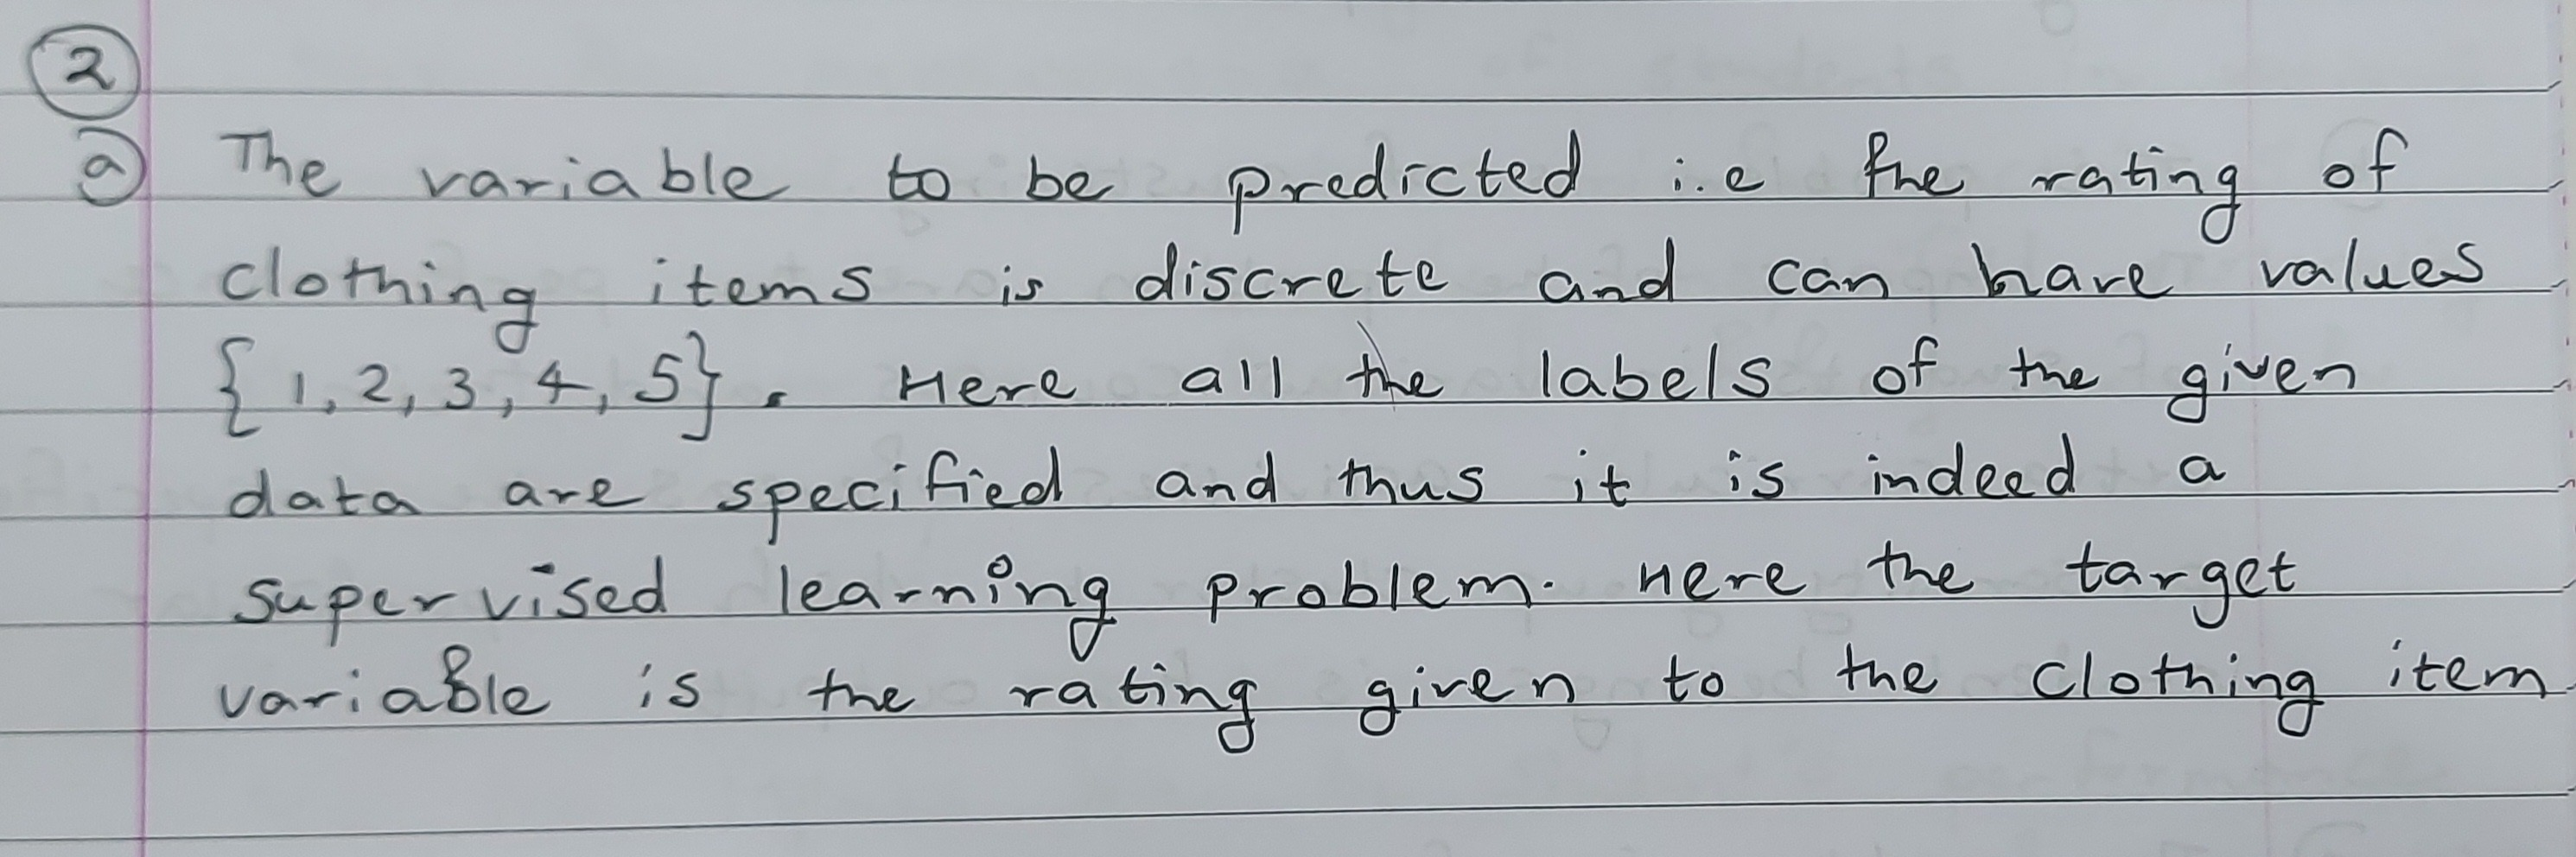

In [151]:
import numpy as np                      # Importing Essential libraries

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import scipy

import statistics as st

import sklearn

## Reading a CSV file into a Dataframe

In [152]:
df = pd.read_csv(r"C:\Users\omkar\Downloads\summer-products-with-rating-and-performance-2020-08.csv")

display(df)

title  \
0     2020 Summer Vintage Flamingo Print  Pajamas Se...   
1     SSHOUSE Summer Casual Sleeveless Soirée Party ...   
2     2020 Nouvelle Arrivée Femmes Printemps et Été ...   
3     Hot Summer Cool T-shirt pour les femmes Mode T...   
4     Femmes Shorts d'été à lacets taille élastique ...   
...                                                 ...   
1568  Nouvelle Mode Femmes Bohême Pissenlit Imprimer...   
1569  10 couleurs femmes shorts d'été lacent ceintur...   
1570  Nouveautés Hommes Siwmwear Beach-Shorts Hommes...   
1571  Mode femmes d'été sans manches robes col en V ...   
1572  Pantalon de yoga pour femmes à la mode Slim Fi...   

                                             title_orig  price  retail_price  \
0     2020 Summer Vintage Flamingo Print  Pajamas Se...  16.00            14   
1      Women's Casual Summer Sleeveless Sexy Mini Dress   8.00            22   
2     2020 New Arrival Women Spring and Summer Beach...   8.00            43   
3     Hot Summer Cool T Shirt for Women Fashion Tops...   8.00             8   
4     Women Summer Shorts Lace Up Elastic Waistband ...   2.72             3   
...                                                 ...    ...           ...   
1568  New Fashion Women Bohemia Dandelion Print Tee ...   6.00             9   
1569  10 Color Women Summer Shorts Lace Up Elastic W...   2.00            56   
1570  New Men Siwmwear Beach-Shorts Men Summer Quick...   5.00            19   
1571  Fashion Women Summer Sleeveless Dresses V Neck...  13.00            11   
1572  Fashion Women Yoga Pants Slim Fit Fitness Runn...   7.00             6   

     currency_buyer  units_sold  uses_ad_boosts  rating  rating_count  \
0               EUR         100               0    3.76            54   
1               EUR       20000               1    3.45          6135   
2               EUR         100               0    3.57            14   
3               EUR        5000               1    4.03           579   
4               EUR         100               1    3.10            20   
...             ...         ...             ...     ...           ...   
1568            EUR       10000               1    4.08          1367   
1569            EUR         100               1    3.07            28   
1570            EUR         100               0    3.71            59   
1571            EUR         100               0    2.50             2   
1572            EUR         100               1    4.07            14   

      rating_five_count  ...  merchant_rating_count  merchant_rating  \
0                  26.0  ...                    568         4.128521   
1                2269.0  ...                  17752         3.899673   
2                   5.0  ...                    295         3.989831   
3                 295.0  ...                  23832         4.020435   
4                   6.0  ...                  14482         4.001588   
...                 ...  ...                    ...              ...   
1568              722.0  ...                   5316         4.224605   
1569               11.0  ...                   4435         3.696054   
1570               24.0  ...                    210         3.961905   
1571                0.0  ...                     31         3.774194   
1572                8.0  ...                   7023         4.235939   

                   merchant_id  merchant_has_profile_picture  \
0     595097d6a26f6e070cb878d1                             0   
1     56458aa03a698c35c9050988                             0   
2     5d464a1ffdf7bc44ee933c65                             0   
3     58cfdefdacb37b556efdff7c                             0   
4     5ab3b592c3911a095ad5dadb                             0   
...                        ...                           ...   
1568  5b507899ab577736508a0782                             0   
1569  54d83b6b6b8a771e478558de                             0   
1570  5b42da1bf64320209fc8da69                             0  

## Finding the total number of rows and columns in the csv data file

In [153]:
no_of_rows = df.shape[0]        # using the shape function to calculate the number of rows and columns of the dataframe where the shape function returns a tuple where the first element is number of rows while the second element is the number of columns.  

no_of_columns = df.shape[1]

print('Dataframe number of rows = '+str(no_of_rows))    # printing the number of rows and columns and converting data type to strings to display them
print('Dataframe number of columns = '+str(no_of_columns))

Dataframe number of rows = 1573
Dataframe number of columns = 43


## Finding the Root Mean Square Error (RMSE)

In [154]:
RMSE_temp = pd.DataFrame()

RMSE_temp = (df['rating_five_count']*(df['rating'] - 5)**2 + df['rating_four_count']*(df['rating'] - 4)**2
         + df['rating_three_count']*(df['rating'] - 3)**2 + df['rating_two_count']*(df['rating'] - 2)**2 + df['rating_one_count']*(df['rating'] - 1)**2)**0.5/df['rating']

RMSE = RMSE_temp.to_list()

## Creating a list containing the names of clothing items

In [155]:
clothing_names = df['title_orig'].to_list()

## Creating a list of clothing items whose future rating is asy to predict based on RMSE

In [156]:
Easy_to_predict_rating = []


for index in range(0,len(RMSE)):
    if(RMSE[index] <= 1):
        Easy_to_predict_rating.append(clothing_names[index])


print('The ratings of ' + str(round(len(Easy_to_predict_rating)*100/no_of_rows,2)) + ' percent of data fields is easy to predict because of very high skew towards a particular rating in past')

The ratings of 10.43 percent of data fields is easy to predict because of very high skew towards a particular rating in past


## Deciding Relevant variables for prediction

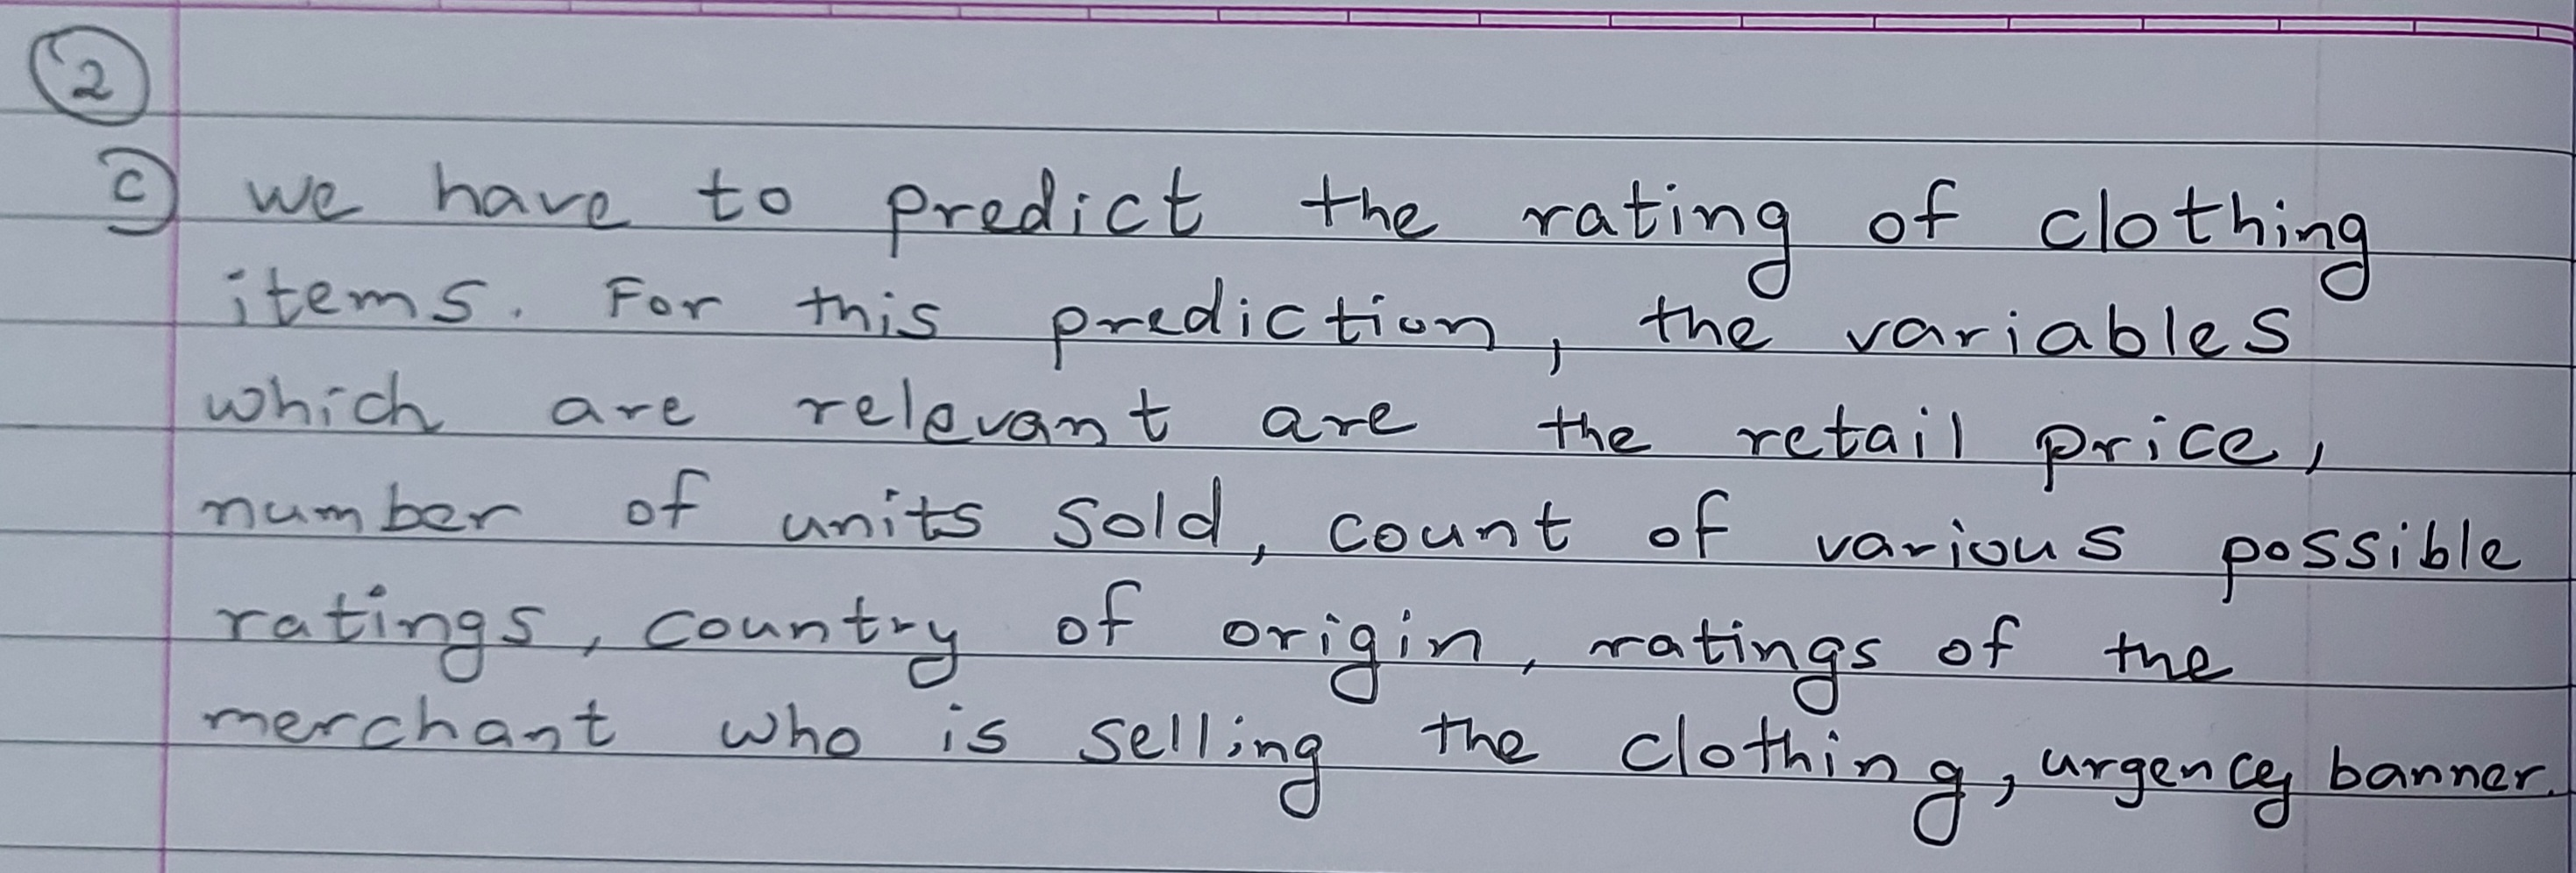

## Deciding Variables which are actually usable for prediction

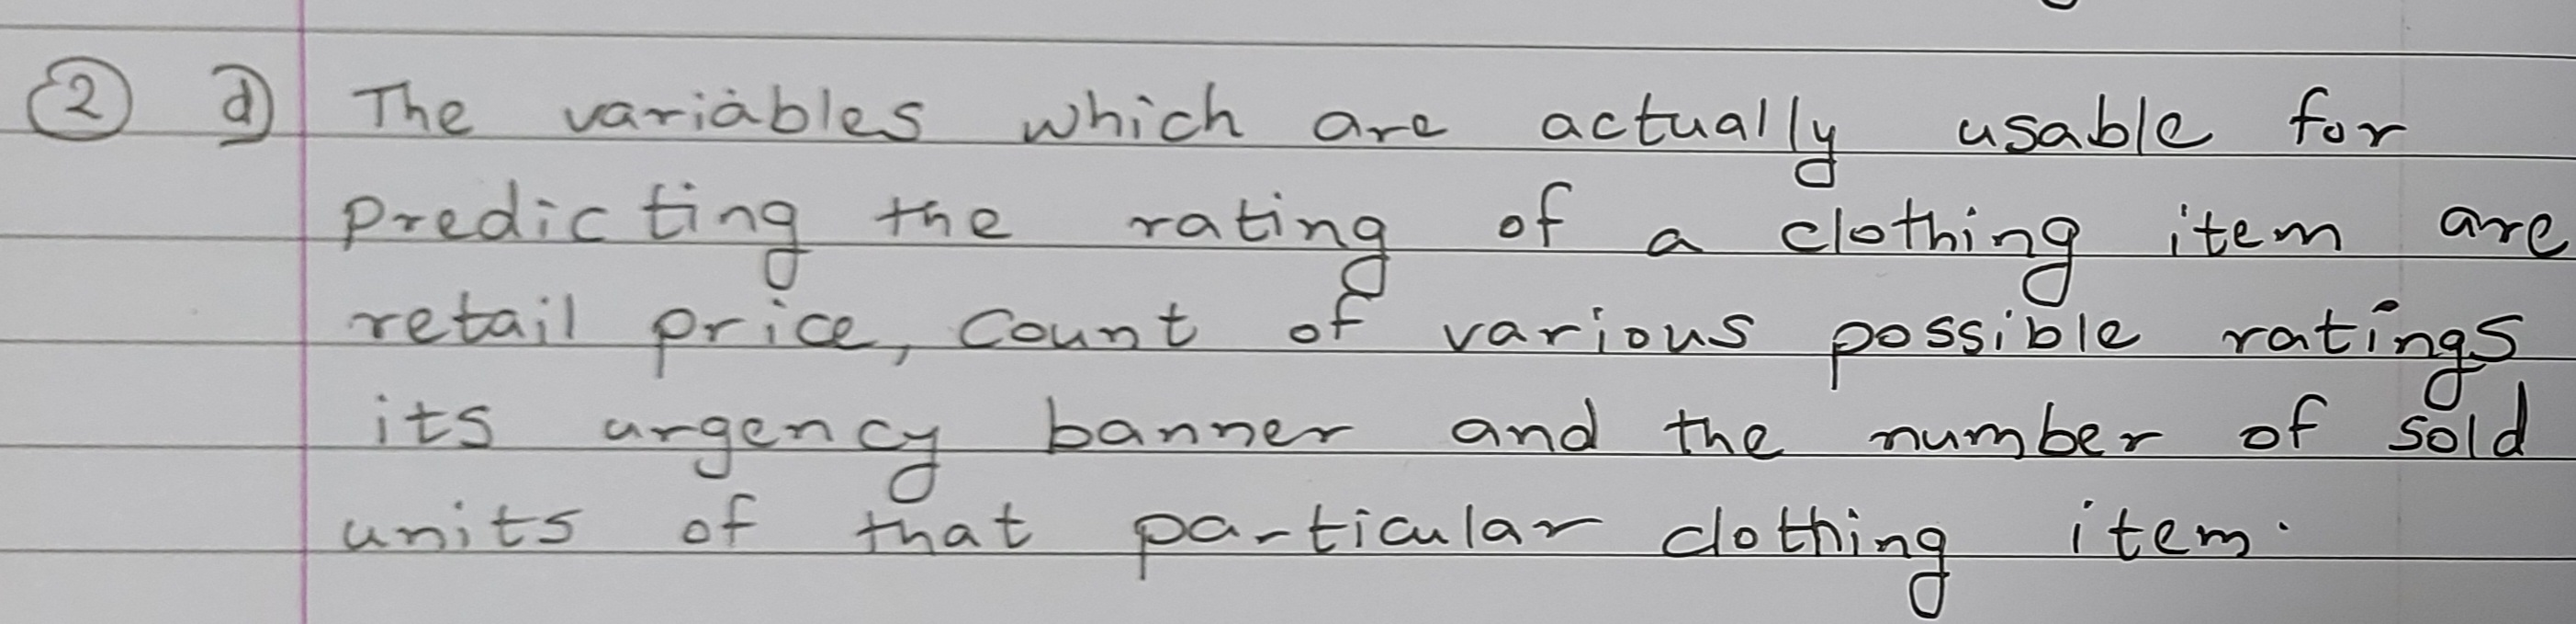

## Creating a temporary DataFrame with necessary columns

In [157]:
df_new = pd.DataFrame()

df_new['title'] = df['title_orig']
df_new['retail_price'] = df['retail_price']
df_new['units_sold'] = df['units_sold']
df_new['rating'] = round(df['rating'])
df_new['rating_count'] = df['rating_count']
df_new['rating_five_count'] = df['rating_five_count']
df_new['rating_four_count'] = df['rating_four_count']
df_new['rating_three_count'] = df['rating_three_count']
df_new['rating_two_count'] = df['rating_two_count']
df_new['rating_one_count'] = df['rating_one_count']
df_new['has_urgency_banner'] = df['has_urgency_banner']
df_new['origin_country'] = df['origin_country']
df_new['merchant_rating_count'] = df['merchant_rating_count']

display(df_new)

title  retail_price  \
0     2020 Summer Vintage Flamingo Print  Pajamas Se...            14   
1      Women's Casual Summer Sleeveless Sexy Mini Dress            22   
2     2020 New Arrival Women Spring and Summer Beach...            43   
3     Hot Summer Cool T Shirt for Women Fashion Tops...             8   
4     Women Summer Shorts Lace Up Elastic Waistband ...             3   
...                                                 ...           ...   
1568  New Fashion Women Bohemia Dandelion Print Tee ...             9   
1569  10 Color Women Summer Shorts Lace Up Elastic W...            56   
1570  New Men Siwmwear Beach-Shorts Men Summer Quick...            19   
1571  Fashion Women Summer Sleeveless Dresses V Neck...            11   
1572  Fashion Women Yoga Pants Slim Fit Fitness Runn...             6   

      units_sold  rating  rating_count  rating_five_count  rating_four_count  \
0            100     4.0            54               26.0                8.0   
1          20000     3.0          6135             2269.0             1027.0   
2            100     4.0            14                5.0                4.0   
3           5000     4.0           579              295.0              119.0   
4            100     3.0            20                6.0                4.0   
...          ...     ...           ...                ...                ...   
1568       10000     4.0          1367              722.0              293.0   
1569         100     3.0            28               11.0                3.0   
1570         100     4.0            59               24.0               15.0   
1571         100     2.0             2                0.0                1.0   
1572         100     4.0            14                8.0                3.0   

      rating_three_count  rating_two_count  rating_one_count  \
0                   10.0               1.0               9.0   
1                 1118.0             644.0            1077.0   
2                    2.0               0.0               3.0   
3                   87.0              42.0              36.0   
4                    2.0               2.0               6.0   
...                  ...               ...               ...   
1568               185.0              77.0              90.0   
1569                 1.0               3.0              10.0   
1570                 8.0               3.0               9.0   
1571                 0.0               0.0               1.0   
1572                 1.0               0.0               2.0   

      has_urgency_banner origin_country  merchant_rating_count  
0                    1.0             CN                    568  
1                    1.0             CN                  17752  
2                    1.0             CN                    295  
3                    NaN             CN                  23832  
4                    1.0             CN                  14482  
...                  ...            ...                    ...  
1568                 NaN             CN                   5316  
1569                 1.0             CN                   4435  
1570                 NaN             CN                    210  
1571                 NaN             CN                     31  
1572                 NaN             CN                   7023  

[1573 rows x 13 columns]

## Converting categorical variables into one-hot BIT dummy variables

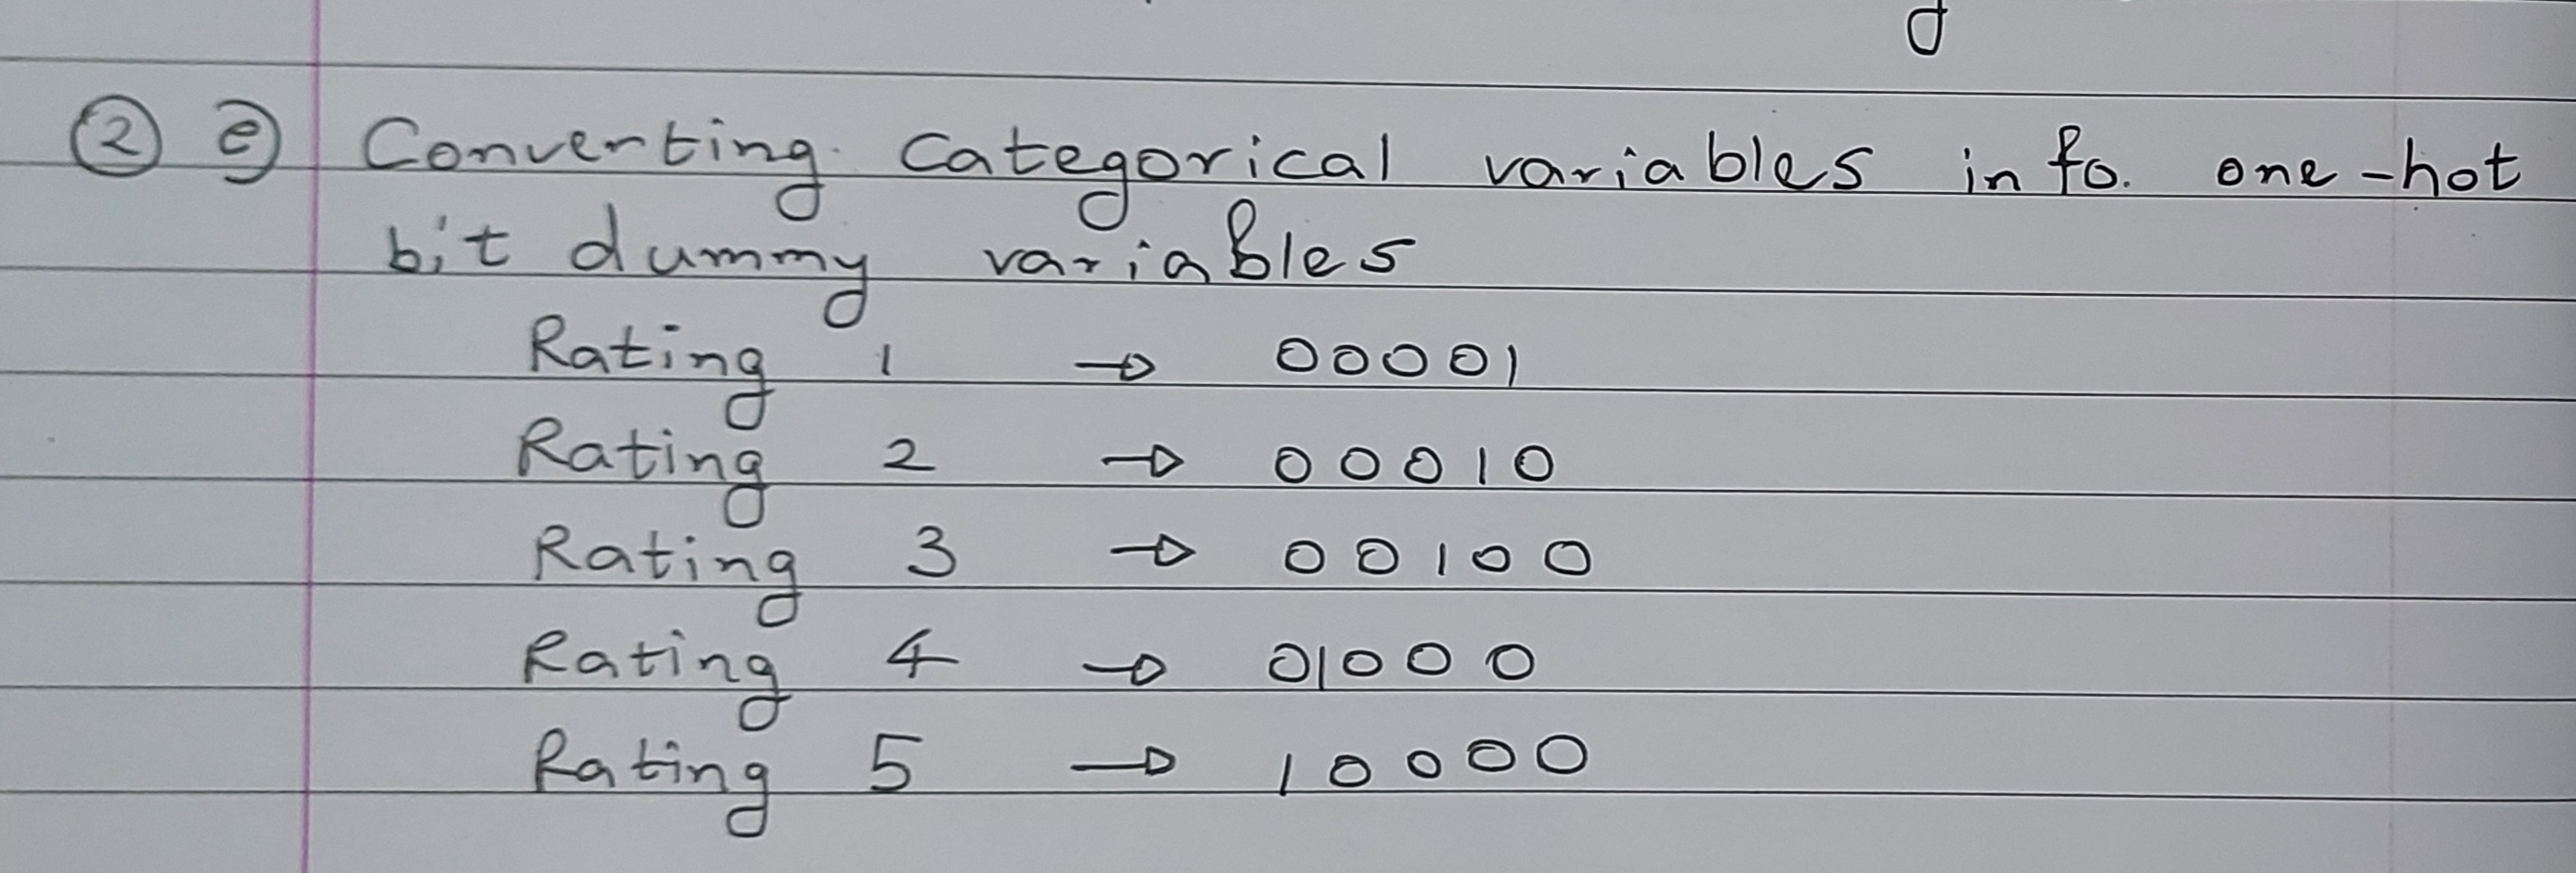

## Assigning values to missing variables

In [158]:
df_new['has_urgency_banner'] = df_new['has_urgency_banner'].replace(np.nan, 0)                  # Replacing nan values by 0

display(df_new['has_urgency_banner'])

0       1.0
1       1.0
2       1.0
3       0.0
4       1.0
       ... 
1568    0.0
1569    1.0
1570    0.0
1571    0.0
1572    0.0
Name: has_urgency_banner, Length: 1573, dtype: float64

## Defining a function to normalize continuous variables

In [159]:
from math import e

def sigmoid(x):
    normalized_value = 1/(1 + e**(-x))
    return normalized_value

## Normalizing continuous variable 'Number of units Sold'

In [160]:
units_sold_in_10k = []

normalized_units_sold = []

units_sold_in_10k = df['units_sold']/10000

for index in range(0, no_of_rows):
    normalized_units_sold.append(sigmoid(units_sold_in_10k[index]))

## Normalizing continuous variable 'Retail price of the item'

In [161]:
retail_price_in_100 = []

normalized_retail_price = []

retail_price_in_100 = df['retail_price']/10

for index in range(0, no_of_rows):
    normalized_retail_price.append(sigmoid(retail_price_in_100[index]))

## Eliminating correlated 'Redundant' Variables

In [162]:
df_new.drop('title', axis=1,inplace=True)

df_new.drop('retail_price', axis=1,inplace=True)

df_new.drop('units_sold', axis=1,inplace=True)

df_new.drop('rating_count', axis=1,inplace=True)

df_new.drop('origin_country', axis=1,inplace=True)

df_new.drop('merchant_rating_count', axis=1,inplace=True)

display(df_new)

rating  rating_five_count  rating_four_count  rating_three_count  \
0        4.0               26.0                8.0                10.0   
1        3.0             2269.0             1027.0              1118.0   
2        4.0                5.0                4.0                 2.0   
3        4.0              295.0              119.0                87.0   
4        3.0                6.0                4.0                 2.0   
...      ...                ...                ...                 ...   
1568     4.0              722.0              293.0               185.0   
1569     3.0               11.0                3.0                 1.0   
1570     4.0               24.0               15.0                 8.0   
1571     2.0                0.0                1.0                 0.0   
1572     4.0                8.0                3.0                 1.0   

      rating_two_count  rating_one_count  has_urgency_banner  
0                  1.0               9.0                 1.0  
1                644.0            1077.0                 1.0  
2                  0.0               3.0                 1.0  
3                 42.0              36.0                 0.0  
4                  2.0               6.0                 1.0  
...                ...               ...                 ...  
1568              77.0              90.0                 0.0  
1569               3.0              10.0                 1.0  
1570               3.0               9.0                 0.0  
1571               0.0               1.0                 0.0  
1572               0.0               2.0                 0.0  

[1573 rows x 7 columns]

## Picking correct ML Frameworks for analysis based on data size

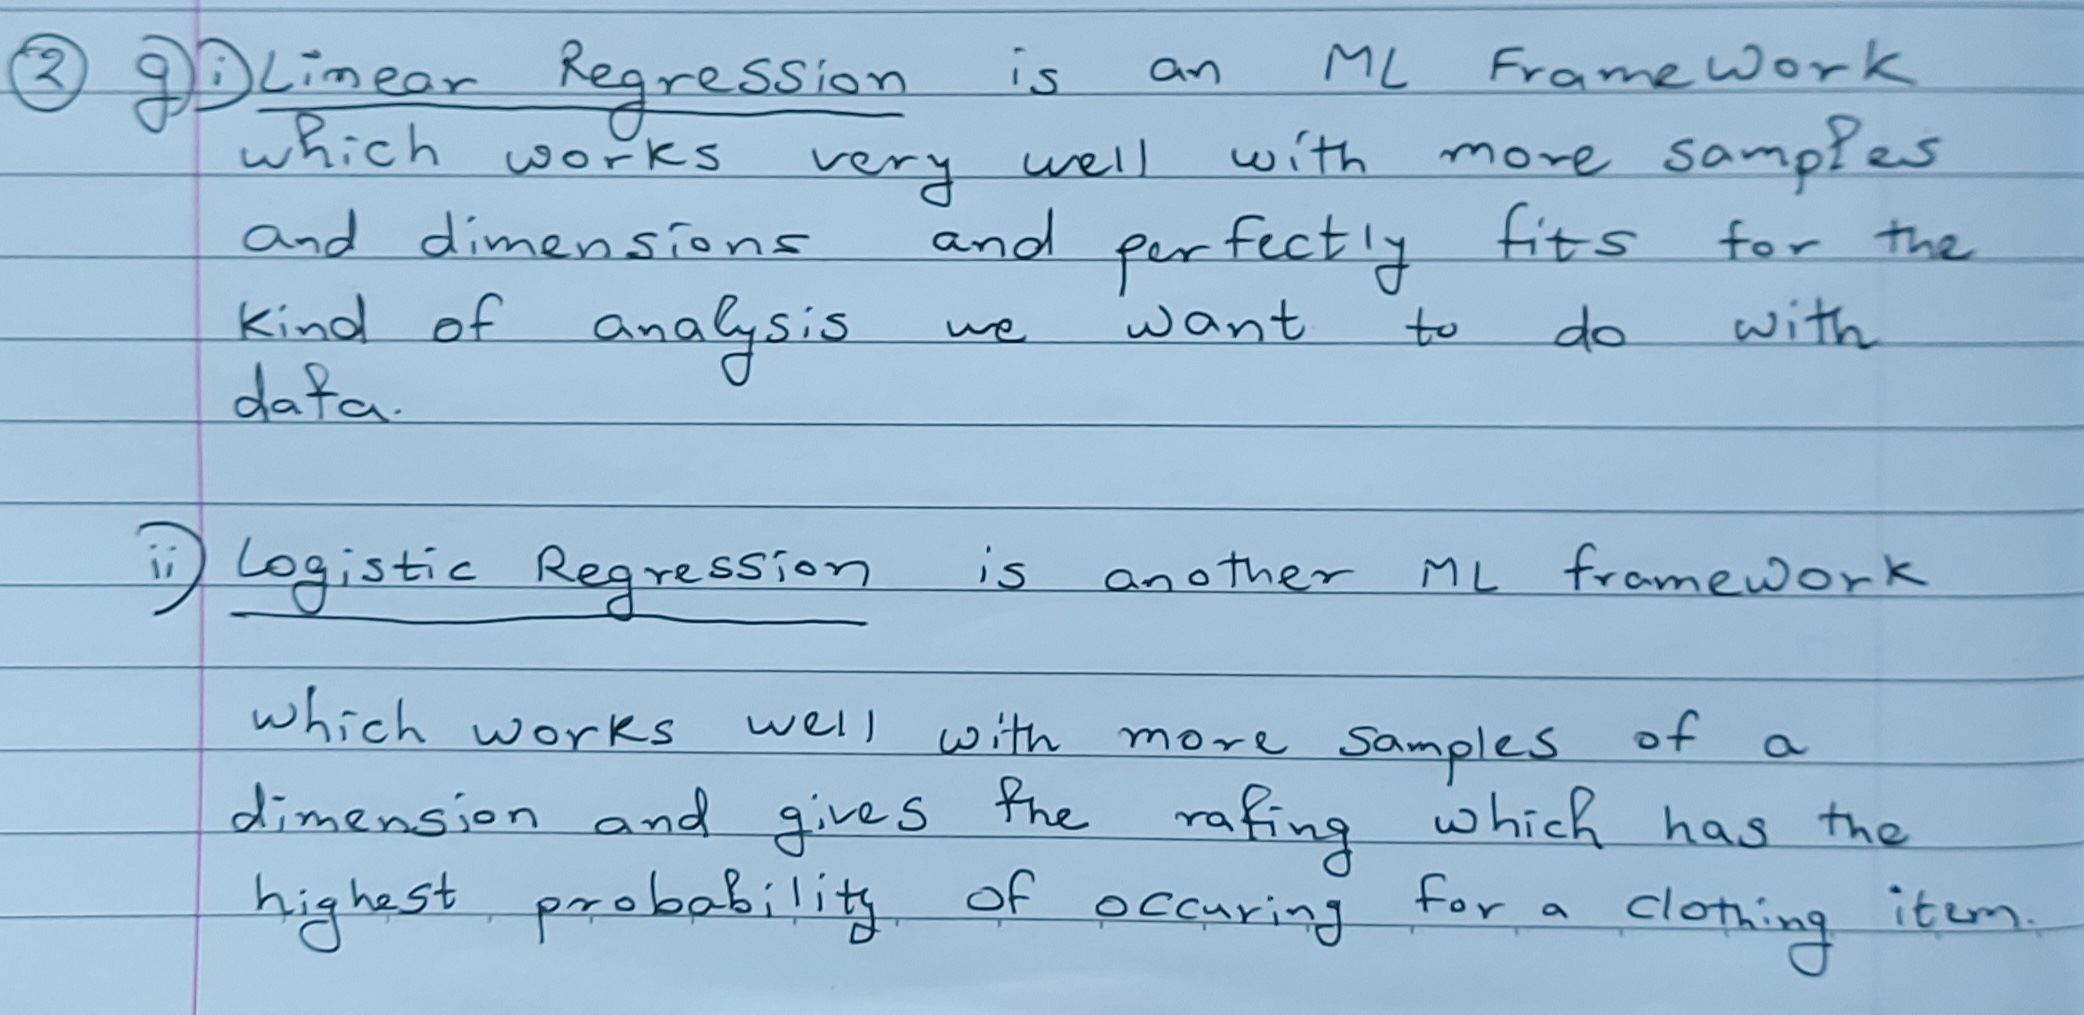

## Dividing the Data into training, validation and testing subsets

In [163]:
from sklearn.model_selection import train_test_split

df_train = pd.DataFrame()

df_temp = pd.DataFrame()

df_validation = pd.DataFrame()

df_test = pd.DataFrame()

df_train, df_temp = train_test_split(df_new, test_size = 0.3)

df_validation, df_test = train_test_split(df_temp, test_size = 0.5)

display(df_train)

rating  rating_five_count  rating_four_count  rating_three_count  \
1568     4.0              722.0              293.0               185.0   
1458     4.0               23.0               14.0                 5.0   
470      4.0              571.0              171.0               116.0   
814      4.0               21.0                5.0                 2.0   
1146     4.0              111.0               38.0                36.0   
...      ...                ...                ...                 ...   
576      4.0                1.0                2.0                 1.0   
1244     4.0              188.0               51.0                20.0   
1181     3.0               69.0               29.0                33.0   
1067     4.0             1646.0              564.0               389.0   
1399     4.0               84.0               31.0                22.0   

      rating_two_count  rating_one_count  has_urgency_banner  
1568              77.0              90.0                 0.0  
1458               4.0               8.0                 0.0  
470               53.0              47.0                 1.0  
814                2.0               5.0                 0.0  
1146              17.0              35.0                 1.0  
...                ...               ...                 ...  
576                0.0               0.0                 0.0  
1244              15.0              26.0                 0.0  
1181              14.0              36.0                 0.0  
1067             145.0             183.0                 0.0  
1399              11.0               7.0                 0.0  

[1101 rows x 7 columns]

## Listing the hyper-parameters for the selected ML Frameworks

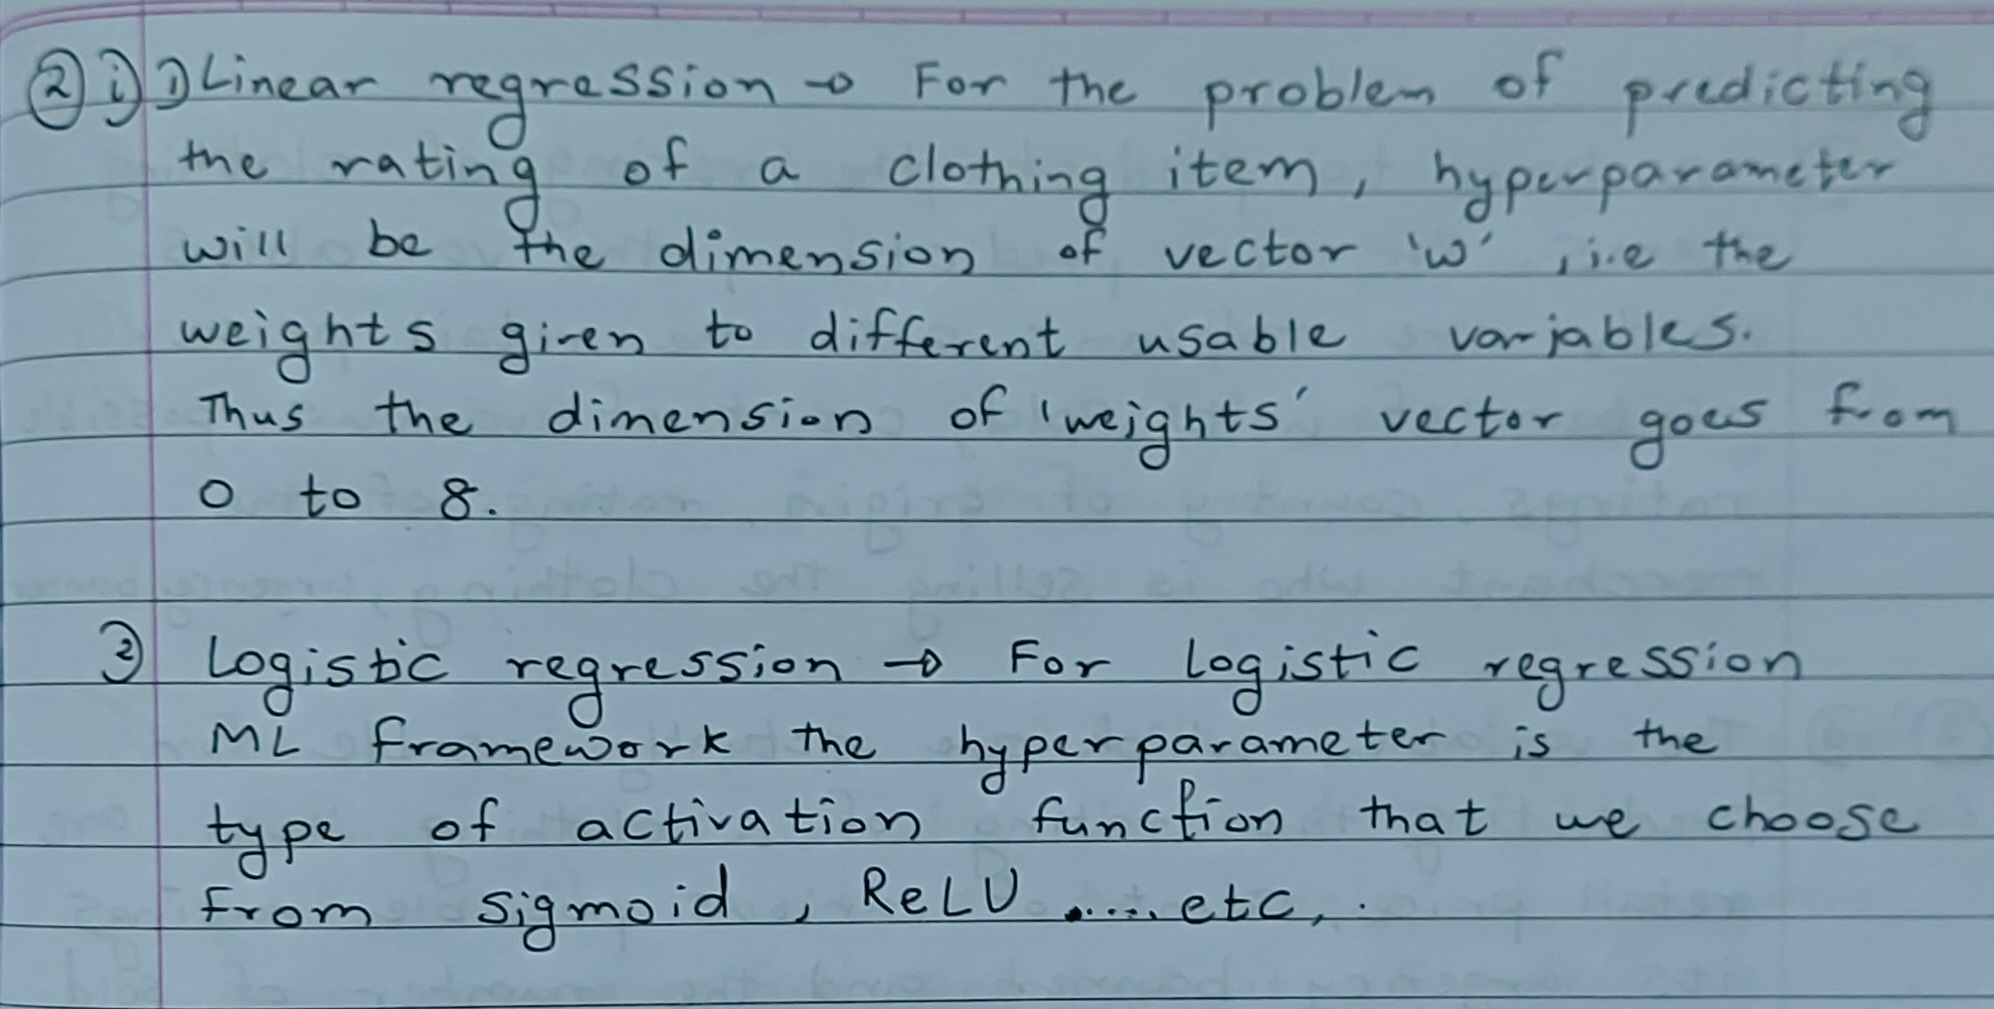

## Normalizing the training, validation and testing data for further analysis

In [164]:
df_train = df_train.replace(np.nan, 0)
df_test = df_test.replace(np.nan, 0)
df_validation = df_validation.replace(np.nan, 0)

column_names = df_train.columns.values



from sklearn import preprocessing

df_train_normal = pd.DataFrame(preprocessing.normalize(df_train), columns=column_names)

df_validation_normal = pd.DataFrame(preprocessing.normalize(df_validation), columns=column_names)

df_test_normal = pd.DataFrame(preprocessing.normalize(df_test), columns=column_names)

display(df_train_normal)

rating  rating_five_count  rating_four_count  rating_three_count  \
0     0.004941           0.891832           0.361921            0.228516   
1     0.137523           0.790756           0.481330            0.171904   
2     0.006543           0.933968           0.279700            0.189738   
3     0.176261           0.925371           0.220326            0.088131   
4     0.031054           0.861735           0.295008            0.279482   
...        ...                ...                ...                 ...   
1096  0.852803           0.213201           0.426401            0.213201   
1097  0.020187           0.948793           0.257385            0.100935   
1098  0.033146           0.762349           0.320408            0.364602   
1099  0.002225           0.915397           0.313660            0.216336   
1100  0.042917           0.901248           0.332603            0.236041   

      rating_two_count  rating_one_count  has_urgency_banner  
0             0.095112          0.111170            0.000000  
1             0.137523          0.275046            0.000000  
2             0.086691          0.076877            0.001636  
3             0.088131          0.220326            0.000000  
4             0.131977          0.271718            0.007763  
...                ...               ...                 ...  
1096          0.000000          0.000000            0.000000  
1097          0.075702          0.131216            0.000000  
1098          0.154680          0.397748            0.000000  
1099          0.080639          0.101773            0.000000  
1100          0.118021          0.075104            0.000000  

[1101 rows x 7 columns]

## Finding True values of the rating for train, validation and test data

In [165]:
means = df_train_normal['rating'].to_list()
means_validation = df_validation_normal['rating'].to_list()
means_test = df_test_normal['rating'].to_list()


df_train_normal.drop('rating', axis=1,inplace=True)
df_validation_normal.drop('rating', axis=1,inplace=True)
df_test_normal.drop('rating', axis=1,inplace=True)

## Performing Linear Regression

In [166]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(df_train_normal, means)

## Reporting coefficient of determination of model on training data

In [167]:
R_sq = model.score(df_train_normal, means)

print(R_sq)

0.8595184555077586


## Reporting coefficient of determination of model on validation data

In [168]:
R_sq_validation = model.score(df_validation_normal, means_validation)

print(R_sq_validation)

0.8810601036342902


## Reporting coefficient of determination of model on test data

In [169]:
R_sq_test = model.score(df_test_normal, means_test)

print(R_sq_test)

0.8569930759736614


## Reasons for the Selected ML framework and the corresponding hyper-parameter

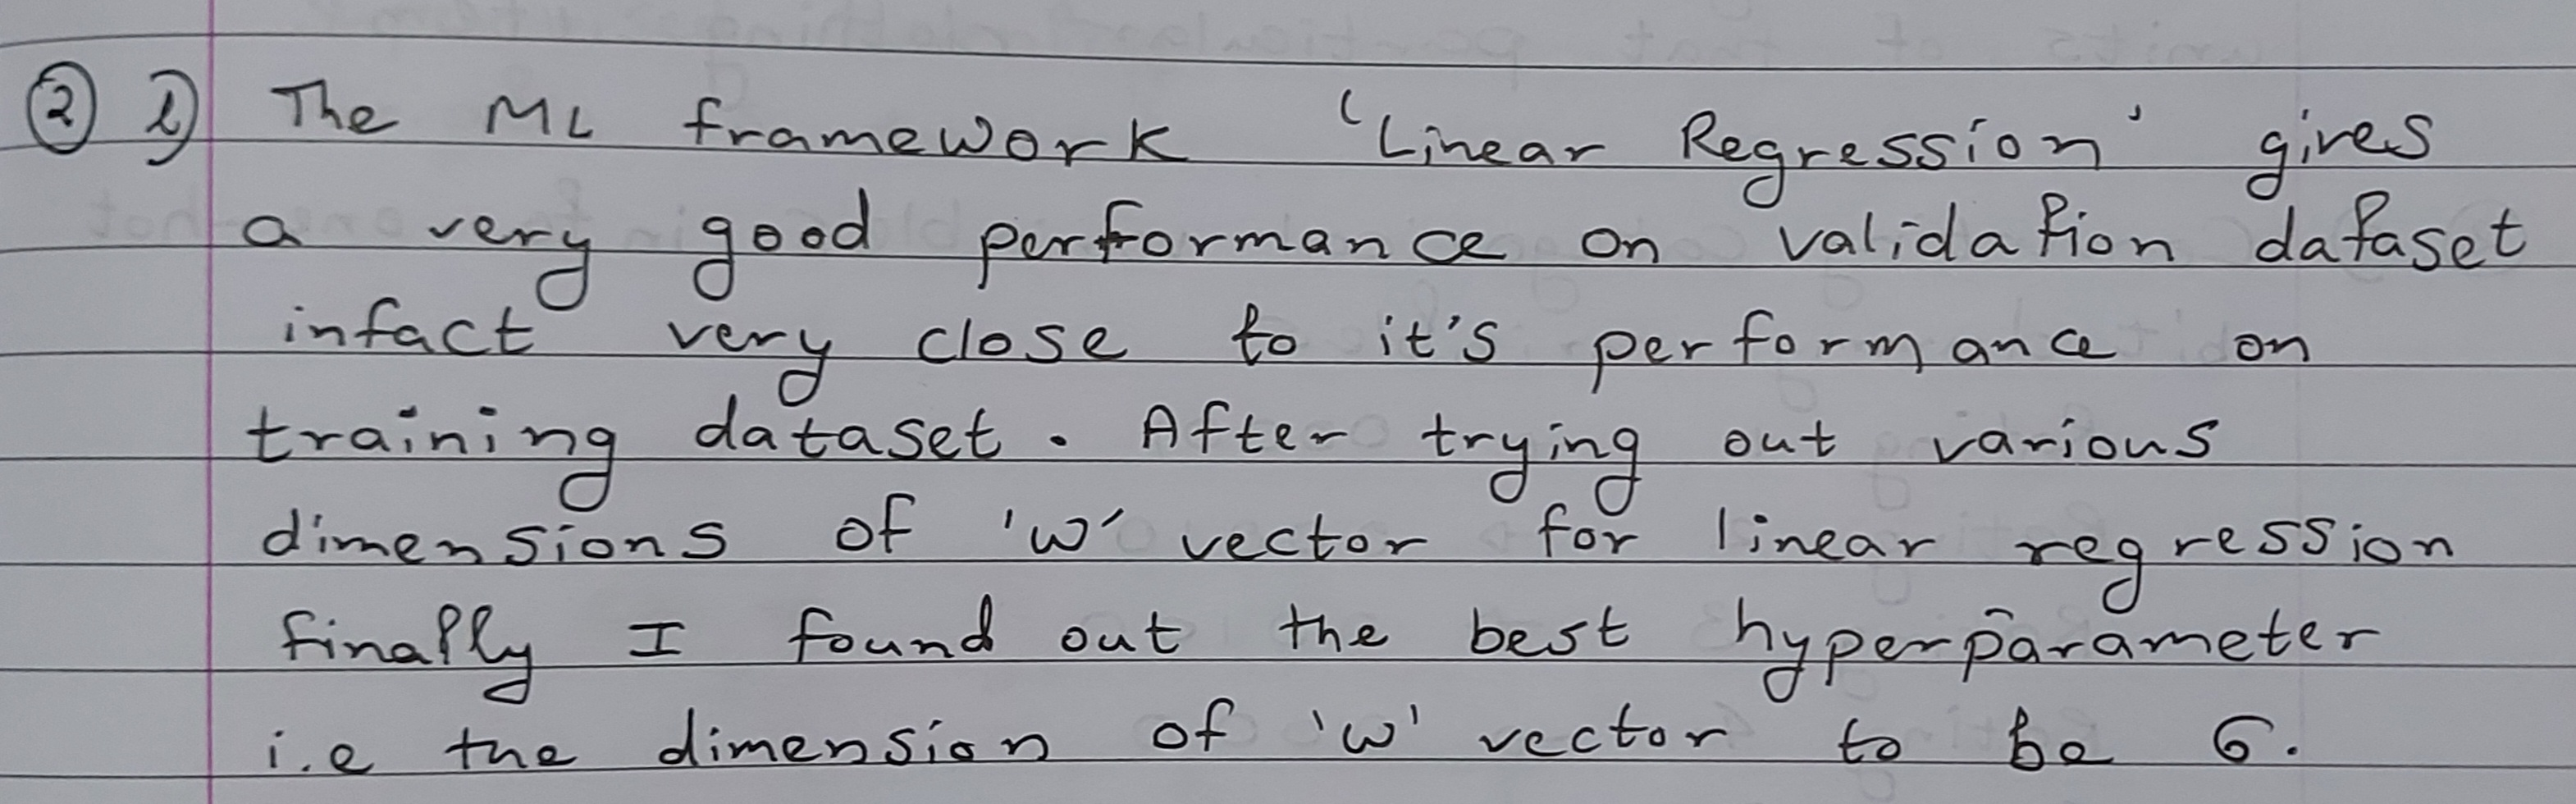

## Comments on the Usability of designed model

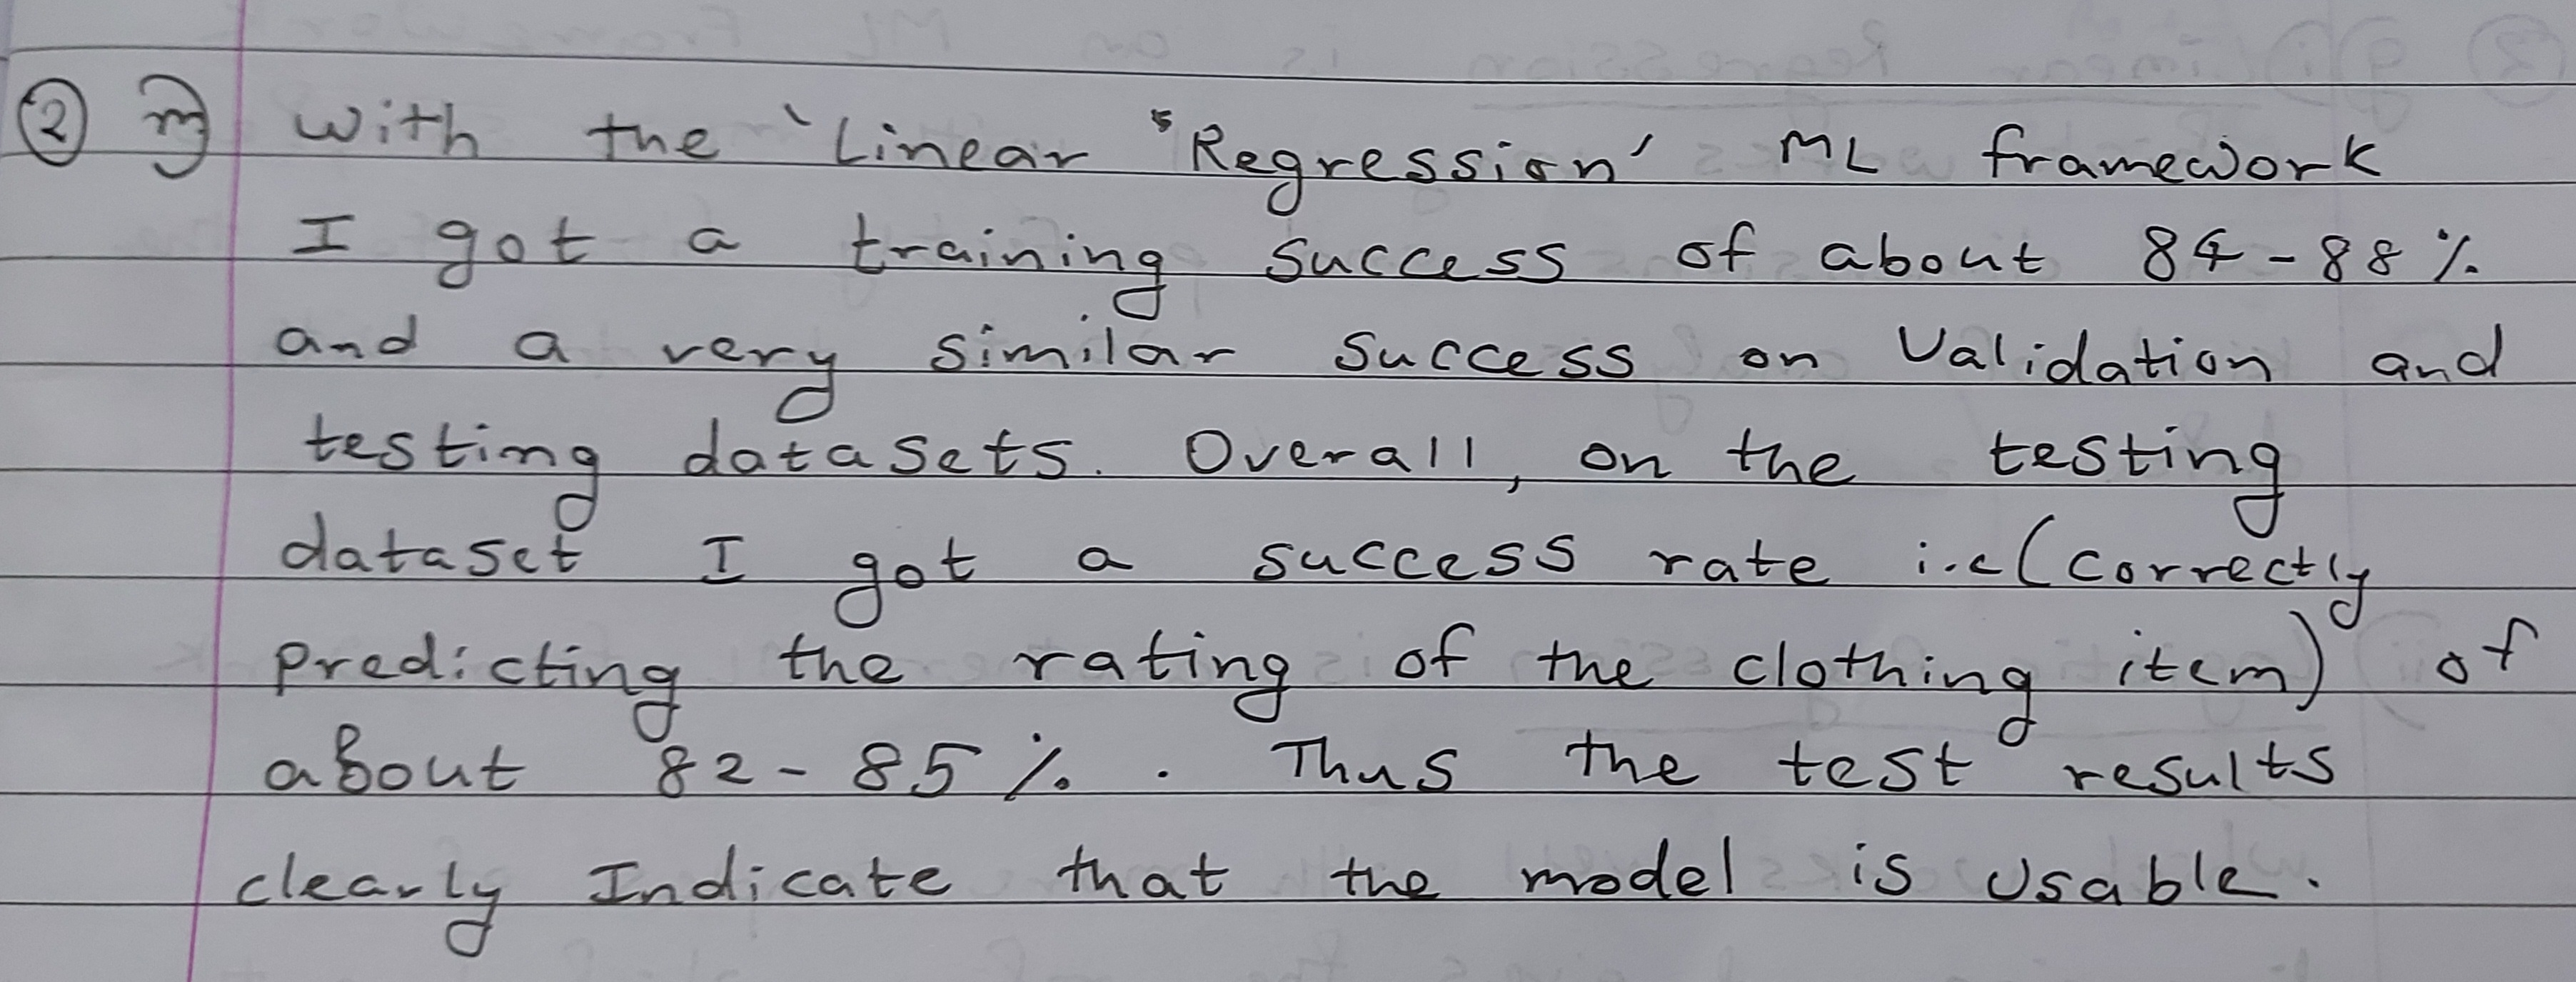

## Predicting gestures based on muscle activity

### The variable to be predicted i.e the gestures based on muscle activity is a continuous variable which can take many possible values. Here the variables are not at all labelled and thus it is indeed an unsupervised learning problem. The target variable is obviously the gestures of the hand.

## Reading a CSV file into a Dataframe

In [170]:
df1 = pd.read_csv(r"C:\Users\omkar\Downloads\dataset.csv")

df1.drop('0', axis=1,inplace=True)

df1 = df1.replace(np.nan, 0)

display(df1)

26.0  4.0  5.0   8.0  -1.0  -13.0  -109.0  -66.0  -9.0  2.0  ...   21.0  \
0    -47.0 -6.0 -5.0  -7.0  13.0   -1.0    35.0  -10.0  10.0 -4.0  ... -105.0   
1    -19.0 -8.0 -8.0  -8.0 -21.0   -6.0   -79.0   12.0   0.0  5.0  ... -128.0   
2      2.0  3.0  0.0   2.0   0.0   22.0   106.0  -14.0 -16.0 -2.0  ...  -54.0   
3      6.0  0.0  0.0  -2.0 -14.0   10.0   -51.0    5.0   7.0  0.0  ...   60.0   
4     15.0 -5.0 -5.0 -15.0  12.0  -22.0   -38.0   36.0   9.0  6.0  ...   22.0   
...    ...  ...  ...   ...   ...    ...     ...    ...   ...  ...  ...    ...   
2904 -12.0  0.0  0.0  -7.0  -4.0   -3.0    -1.0   -5.0   4.0 -1.0  ...   44.0   
2905  -9.0 -1.0 -2.0   1.0 -13.0  -14.0   -59.0   -4.0  -9.0  0.0  ...   74.0   
2906   3.0 -2.0 -2.0   4.0  18.0   -5.0   -31.0    7.0  -3.0 -3.0  ...   93.0   
2907  -2.0 -2.0 -2.0   1.0  -3.0  -17.0   -33.0  -13.0   3.0  2.0  ...  -11.0   
2908   0.0 -2.0 -3.0  -2.0   2.0    5.0    18.0   -1.0  -5.0 -2.0  ...   59.0   

      -28.0  61.0  4.0.3  8.0.1  5.0.1  4.0.4  -7.0.1  -59.0  16.0  
0     -25.0  47.0    6.0    6.0    5.0   13.0    21.0  111.0  15.0  
1     -83.0   7.0    7.0    1.0   -8.0    7.0    21.0  114.0  48.0  
2     -38.0 -11.0    4.0    7.0   11.0   33.0    39.0  119.0  43.0  
3      38.0 -35.0   -8.0    2.0    6.0  -13.0   -24.0 -112.0 -69.0  
4     -26.0   5.0    6.0    6.0   11.0    5.0    30.0  -48.0  25.0  
...     ...   ...    ...    ...    ...    ...     ...    ...   ...  
2904   12.0  -3.0    0.0    2.0   -1.0   -1.0     4.0  -30.0 -20.0  
2905   20.0  -4.0    0.0    0.0    0.0  -21.0   -10.0  -14.0 -29.0  
2906   34.0  -7.0    4.0    4.0    2.0    1.0     4.0  -55.0  -4.0  
2907   -4.0   0.0    3.0    0.0    5.0    9.0     8.0  -13.0  11.0  
2908   -2.0  -4.0    6.0    1.0   -8.0  -15.0     3.0    5.0  10.0  

[2909 rows x 64 columns]

## Finding the total number of rows and columns in the csv data file

In [171]:
no_of_rows = df1.shape[0]        # using the shape function to calculate the number of rows and columns of the dataframe where the shape function returns a tuple where the first element is number of rows while the second element is the number of columns.  

no_of_columns = df1.shape[1]

print('Dataframe number of rows = '+str(no_of_rows))    # printing the number of rows and columns and converting data type to strings to display them
print('Dataframe number of columns = '+str(no_of_columns))

Dataframe number of rows = 2909
Dataframe number of columns = 64


## Defining different gestures

In [172]:
number = 1
gesture_no = np.zeros(no_of_rows)

df_ = pd.DataFrame()

df_['gestures'] = gesture_no

for index in df1.columns.values:
    df_['gestures'] += df1[index]
    df_[index] = df1[index]

df_['gestures'] = round(df_['gestures']/no_of_columns)
display(df_)

gestures  26.0  4.0  5.0   8.0  -1.0  -13.0  -109.0  -66.0  -9.0  ...  \
0          1.0 -47.0 -6.0 -5.0  -7.0  13.0   -1.0    35.0  -10.0  10.0  ...   
1         -4.0 -19.0 -8.0 -8.0  -8.0 -21.0   -6.0   -79.0   12.0   0.0  ...   
2          1.0   2.0  3.0  0.0   2.0   0.0   22.0   106.0  -14.0 -16.0  ...   
3         -6.0   6.0  0.0  0.0  -2.0 -14.0   10.0   -51.0    5.0   7.0  ...   
4          0.0  15.0 -5.0 -5.0 -15.0  12.0  -22.0   -38.0   36.0   9.0  ...   
...        ...   ...  ...  ...   ...   ...    ...     ...    ...   ...  ...   
2904       1.0 -12.0  0.0  0.0  -7.0  -4.0   -3.0    -1.0   -5.0   4.0  ...   
2905      -2.0  -9.0 -1.0 -2.0   1.0 -13.0  -14.0   -59.0   -4.0  -9.0  ...   
2906      -3.0   3.0 -2.0 -2.0   4.0  18.0   -5.0   -31.0    7.0  -3.0  ...   
2907      -0.0  -2.0 -2.0 -2.0   1.0  -3.0  -17.0   -33.0  -13.0   3.0  ...   
2908       1.0   0.0 -2.0 -3.0  -2.0   2.0    5.0    18.0   -1.0  -5.0  ...   

       21.0  -28.0  61.0  4.0.3  8.0.1  5.0.1  4.0.4  -7.0.1  -59.0  16.0  
0    -105.0  -25.0  47.0    6.0    6.0    5.0   13.0    21.0  111.0  15.0  
1    -128.0  -83.0   7.0    7.0    1.0   -8.0    7.0    21.0  114.0  48.0  
2     -54.0  -38.0 -11.0    4.0    7.0   11.0   33.0    39.0  119.0  43.0  
3      60.0   38.0 -35.0   -8.0    2.0    6.0  -13.0   -24.0 -112.0 -69.0  
4      22.0  -26.0   5.0    6.0    6.0   11.0    5.0    30.0  -48.0  25.0  
...     ...    ...   ...    ...    ...    ...    ...     ...    ...   ...  
2904   44.0   12.0  -3.0    0.0    2.0   -1.0   -1.0     4.0  -30.0 -20.0  
2905   74.0   20.0  -4.0    0.0    0.0    0.0  -21.0   -10.0  -14.0 -29.0  
2906   93.0   34.0  -7.0    4.0    4.0    2.0    1.0     4.0  -55.0  -4.0  
2907  -11.0   -4.0   0.0    3.0    0.0    5.0    9.0     8.0  -13.0  11.0  
2908   59.0   -2.0  -4.0    6.0    1.0   -8.0  -15.0     3.0    5.0  10.0  

[2909 rows x 65 columns]

In [173]:
from math import inf


RMSE_temp = pd.DataFrame()

zeroes = np.zeros(no_of_rows)

RMSE_temp['answer'] = zeroes

for col in df1.columns.values:
    RMSE_temp['answer'] += (df_[col] - df_['gestures'])**2

RMSE_temp['answer'] = RMSE_temp['answer']**0.5/abs(df_['gestures'])

RMSE_temp['answer'] = RMSE_temp['answer'].replace(inf, 0)



RMSE = RMSE_temp['answer'].to_list()

print(RMSE)

[271.3963890695674, 75.700478862422, 249.8059246695322, 46.45995886543355, 0.0, 41.35698248180106, 52.769677740999036, 103.78075180130679, 0.0, 301.48300117917097, 57.4212504217733, 166.8000299760165, 40.53245613085888, 85.804687776627, 282.91871624196233, 130.17104132640256, 83.31999893316264, 49.392981957629026, 0.0, 268.06156009394556, 253.23309420373948, 108.66692229008788, 38.71934271136327, 178.06740296865118, 0.0, 36.5759483814159, 250.2159067685346, 223.85486369520765, 215.32997933404442, 82.41965784932621, 185.75521526998912, 104.14773161235918, 109.12149192528481, 93.08598175880189, 96.42873015859952, 207.24140512938047, 0.0, 46.847269575362304, 0.0, 60.024994793835674, 123.14625451064275, 74.81978348003956, 210.17849556983703, 89.69810477373532, 49.18904857791011, 0.0, 63.84964978586631, 202.89652535221, 46.39204912721815, 197.37781030298214, 135.34770038681853, 62.47132675609401, 0.0, 0.0, 158.1992414646796, 0.0, 166.36706404814626, 0.0, 126.8857754044952, 57.09859893202284

## Deciding relevant variables for prediction

### In this case of predicting gestures based on muscle activity all the columns i.e all readings are very important for prediction

### All the columns contain integer values which are Discrete and thus it does not require any kind of normalization as such and also as there are no categorical variables it does not require any kind of one-hot-BIT encoding

## Determining correlation between various columns of the dataframe

In [174]:
correlation_Matrix = df1.corr(method = 'spearman')
number = 0

for col in correlation_Matrix.columns.values:
    temp = correlation_Matrix[col].to_list()
    for i in range(0, len(temp)):
        if ((abs(temp[i]) >= 0.5) and (temp[i] != 1)):
            number += 1

print('number of high correlation squares are '+ str(number) + '/4096 i.e only '+ str(1600/4096) + ' percent')

number of high correlation squares are 16/4096 i.e only 0.390625 percent


### Because of very low either positive or negative correlation between columns it's not required to remove any of the columns before analysis i.e there are no redundant columns

## Picking the correct ML framework for analysis based on data size

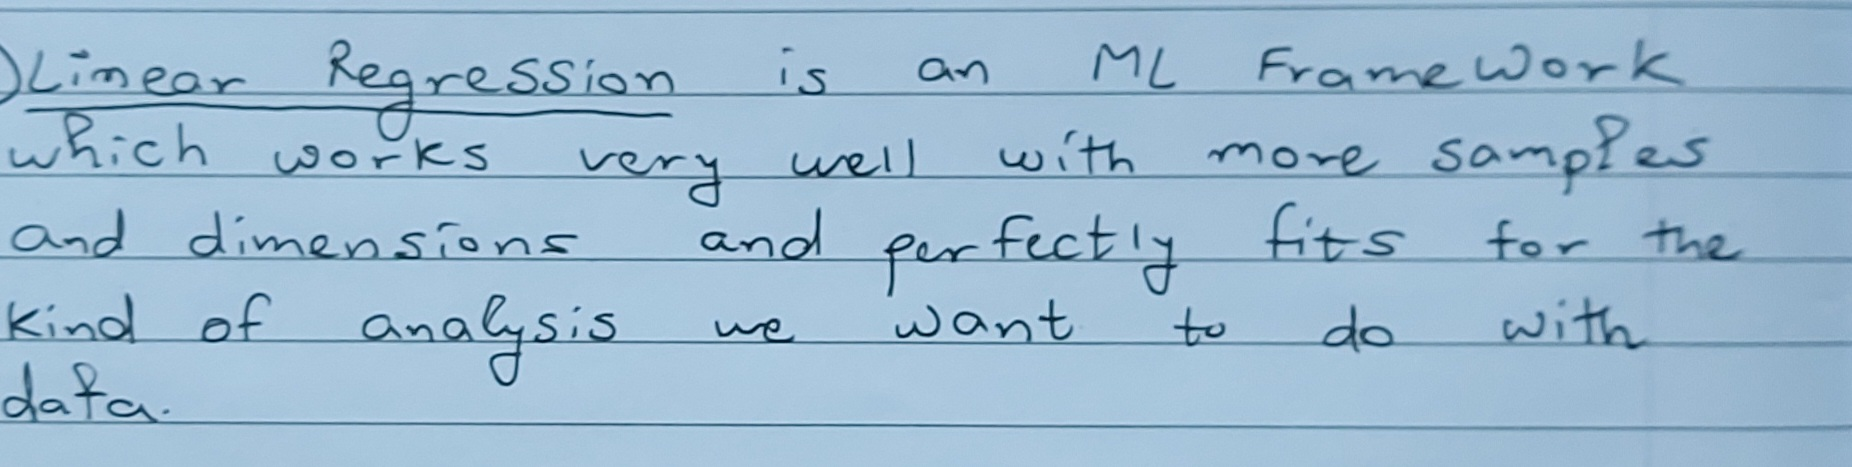

## Dividing the Data into training, validation and testing subsets

In [175]:
from sklearn.model_selection import train_test_split

df1_train = pd.DataFrame()

df1_temp = pd.DataFrame()

df1_validation = pd.DataFrame()

df1_test = pd.DataFrame()

df1_train, df1_temp = train_test_split(df_, test_size = 0.3)

df1_validation, df1_test = train_test_split(df1_temp, test_size = 0.5)

display(df1_train)

gestures  26.0   4.0   5.0   8.0  -1.0  -13.0  -109.0  -66.0  -9.0  ...  \
575       -3.0 -33.0   0.0  -3.0 -14.0  16.0   21.0   -27.0  -27.0  26.0  ...   
1735       0.0  35.0   2.0  -6.0 -12.0 -13.0    7.0   -25.0    8.0 -27.0  ...   
20        -1.0   2.0  -2.0  -9.0 -25.0 -19.0   33.0    76.0   17.0 -30.0  ...   
513        1.0 -30.0  -2.0  -3.0  -5.0  -5.0   13.0   -48.0  -17.0 -32.0  ...   
2120      -1.0  16.0   8.0  -8.0  -8.0 -12.0   13.0   -38.0    0.0 -17.0  ...   
...        ...   ...   ...   ...   ...   ...    ...     ...    ...   ...  ...   
786        2.0 -16.0  12.0   3.0   9.0   1.0   -1.0   121.0   60.0  28.0  ...   
2134       1.0 -10.0   1.0  -9.0   5.0   2.0   -9.0   -17.0  -14.0  -4.0  ...   
1652      -0.0   8.0  -2.0  -3.0  -2.0   8.0    1.0   -20.0   -1.0 -16.0  ...   
2245      -2.0   2.0   3.0 -11.0  -3.0   7.0   -5.0   -17.0  -10.0   1.0  ...   
2540       1.0   1.0   2.0   2.0   6.0  -3.0    4.0    -5.0    1.0   2.0  ...   

       21.0  -28.0  61.0  4.0.3  8.0.1  5.0.1  4.0.4  -7.0.1  -59.0  16.0  
575     1.0    1.0 -37.0    0.0    6.0    6.0    9.0    -1.0  -13.0 -15.0  
1735   24.0    7.0   0.0   -2.0    4.0  -14.0   -8.0    -6.0  -24.0  -6.0  
20     51.0   22.0 -17.0    2.0    5.0   12.0   -2.0     5.0   18.0  19.0  
513   105.0   12.0   3.0   -1.0    3.0    2.0    8.0    22.0   70.0  31.0  
2120   16.0    7.0   0.0   12.0   -2.0    0.0  -21.0   -26.0   18.0   2.0  
...     ...    ...   ...    ...    ...    ...    ...     ...    ...   ...  
786    76.0  -11.0 -48.0  -10.0   -1.0   -4.0   -6.0    45.0   38.0  10.0  
2134   28.0   41.0   5.0  -11.0   -5.0   -1.0   -6.0    -1.0    4.0   9.0  
1652   24.0   27.0   9.0    1.0    4.0    9.0    9.0     0.0  -31.0  -1.0  
2245  -35.0   -1.0  25.0   25.0    5.0   -2.0  -10.0   -13.0   -4.0  -5.0  
2540   27.0    8.0  -2.0    2.0    3.0    0.0   13.0     1.0   43.0   4.0  

[2036 rows x 65 columns]

## Listing the hyper-parameters for the selected ML Framework

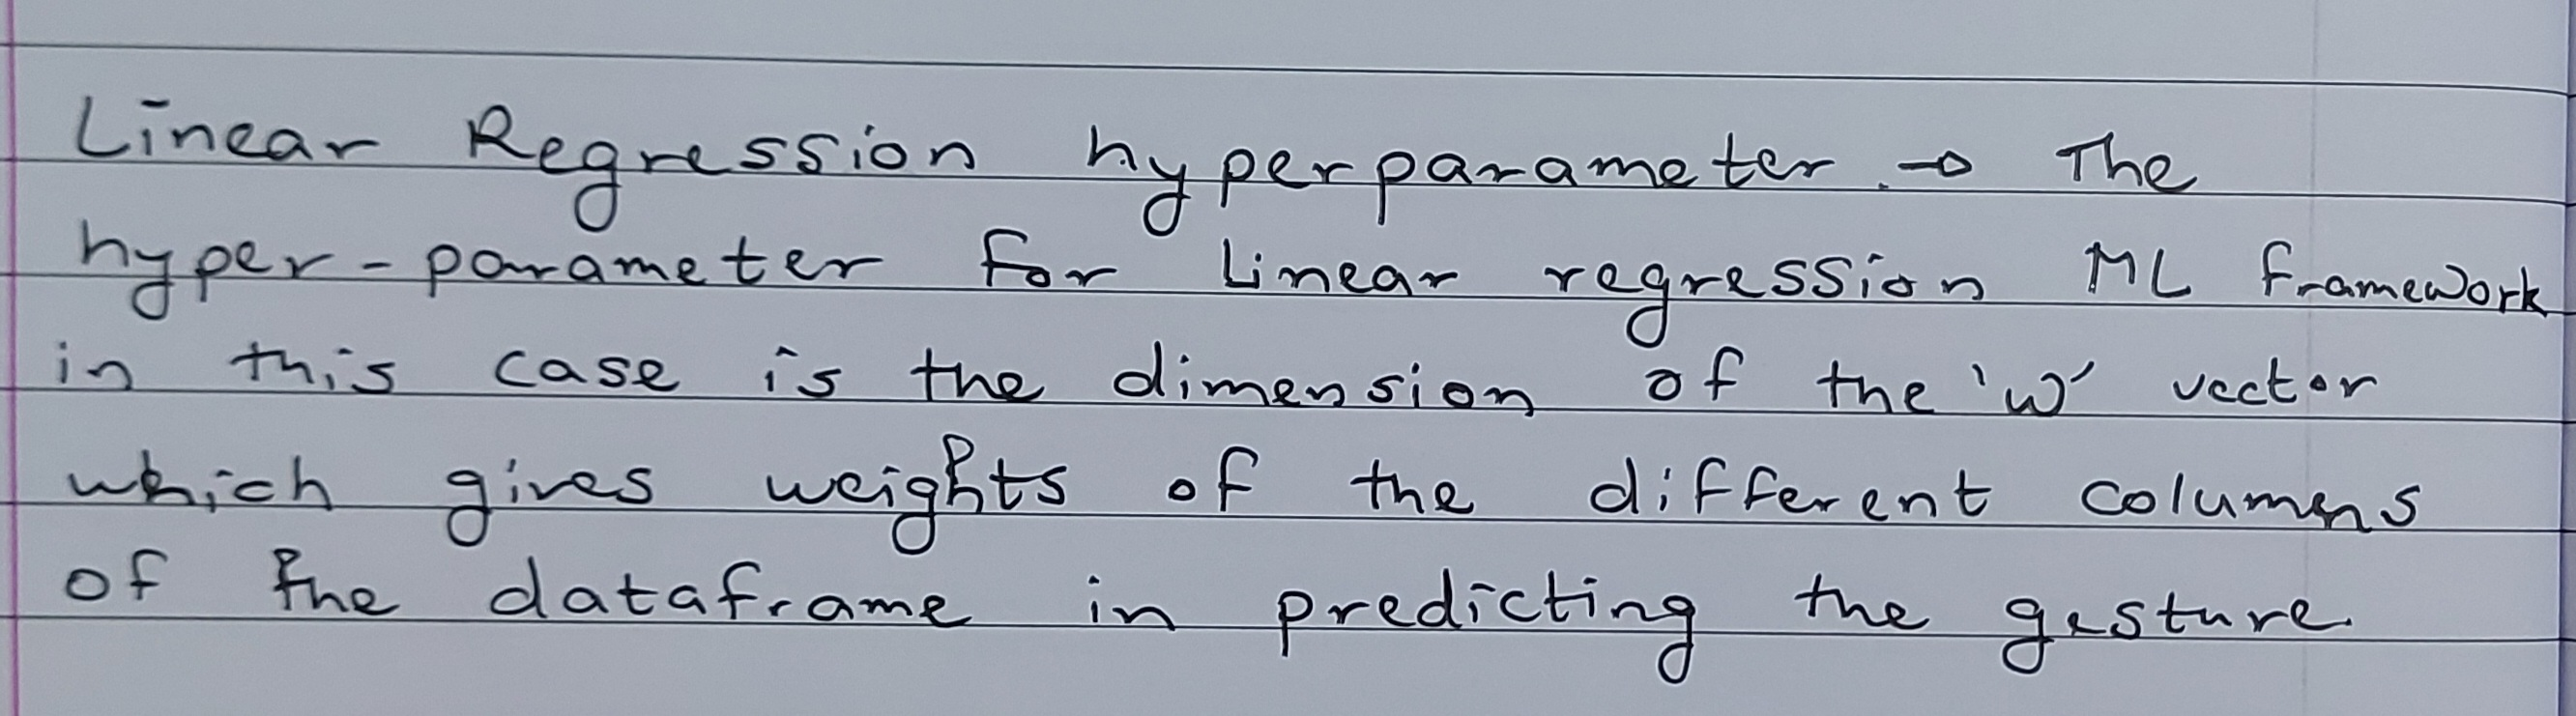

## Normalizing the training, validation and testing data for further analysis

In [176]:
column_names = df1_train.columns.values



from sklearn import preprocessing

df1_train_normal = pd.DataFrame(preprocessing.normalize(df1_train), columns=column_names)

df1_validation_normal = pd.DataFrame(preprocessing.normalize(df1_validation), columns=column_names)

df1_test_normal = pd.DataFrame(preprocessing.normalize(df1_test), columns=column_names)

display(df1_train_normal)

gestures      26.0       4.0       5.0       8.0      -1.0     -13.0  \
0    -0.020699 -0.227684  0.000000 -0.020699 -0.096593  0.110392  0.144890   
1     0.000000  0.330837  0.018905 -0.056715 -0.113430 -0.122882  0.066167   
2    -0.003948  0.007896 -0.007896 -0.035531 -0.098696 -0.075009  0.130279   
3     0.003870 -0.116093 -0.007740 -0.011609 -0.019349 -0.019349  0.050307   
4    -0.005898  0.094363  0.047181 -0.047181 -0.047181 -0.070772  0.076670   
...        ...       ...       ...       ...       ...       ...       ...   
2031  0.008568 -0.068544  0.051408  0.012852  0.038556  0.004284 -0.004284   
2032  0.005471 -0.054714  0.005471 -0.049243  0.027357  0.010943 -0.049243   
2033 -0.000000  0.094623 -0.023656 -0.035484 -0.023656  0.094623  0.011828   
2034 -0.015616  0.015616  0.023425 -0.085890 -0.023425  0.054657 -0.039041   
2035  0.007355  0.007355  0.014710  0.014710  0.044130 -0.022065  0.029420   

        -109.0     -66.0      -9.0  ...      21.0     -28.0      61.0  \
0    -0.186287 -0.186287  0.179387  ...  0.006900  0.006900 -0.255282   
1    -0.236312  0.075620 -0.255217  ...  0.226860  0.066167  0.000000   
2     0.300037  0.067114 -0.118436  ...  0.201341  0.086853 -0.067114   
3    -0.185750 -0.065786 -0.123833  ...  0.406327  0.046437  0.011609   
4    -0.224112  0.000000 -0.100261  ...  0.094363  0.041284  0.000000   
...        ...       ...       ...  ...       ...       ...       ...   
2031  0.518364  0.257040  0.119952  ...  0.325584 -0.047124 -0.205632   
2032 -0.093014 -0.076600 -0.021886  ...  0.153200  0.224329  0.027357   
2033 -0.236558 -0.011828 -0.189246  ...  0.283870  0.319353  0.106451   
2034 -0.132740 -0.078082  0.007808  ... -0.273287 -0.007808  0.195205   
2035 -0.036775  0.007355  0.014710  ...  0.198583  0.058839 -0.014710   

         4.0.3     8.0.1     5.0.1     4.0.4    -7.0.1     -59.0      16.0  
0     0.000000  0.041397  0.041397  0.062096 -0.006900 -0.089694 -0.103493  
1    -0.018905  0.037810 -0.132335 -0.075620 -0.056715 -0.226860 -0.056715  
2     0.007896  0.019739  0.047374 -0.007896  0.019739  0.071061  0.075009  
3    -0.003870  0.011609  0.007740  0.030958  0.085135  0.270885  0.119963  
4     0.070772 -0.011795  0.000000 -0.123851 -0.153340  0.106158  0.011795  
...        ...       ...       ...       ...       ...       ...       ...  
2031 -0.042840 -0.004284 -0.017136 -0.025704  0.192780  0.162792  0.042840  
2032 -0.060186 -0.027357 -0.005471 -0.032829 -0.005471  0.021886  0.049243  
2033  0.011828  0.047312  0.106451  0.106451  0.000000 -0.366665 -0.011828  
2034  0.195205  0.039041 -0.015616 -0.078082 -0.101507 -0.031233 -0.039041  
2035  0.014710  0.022065  0.000000  0.095614  0.007355  0.316262  0.029420  

[2036 rows x 65 columns]

## Finding True values of the rating for train, validation and test data

In [177]:
means = df1_train_normal['gestures'].to_list()
means_validation = df1_validation_normal['gestures'].to_list()
means_test = df1_test_normal['gestures'].to_list()


df1_train_normal.drop('gestures', axis=1,inplace=True)
df1_validation_normal.drop('gestures', axis=1,inplace=True)
df1_test_normal.drop('gestures', axis=1,inplace=True)

## Performing Linear Regression

In [178]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(df1_train_normal, means)

## Reporting coefficient of determination of model on training data

In [179]:
R_sq = model.score(df1_train_normal, means)

print(R_sq)

0.9659021083360475


## Reporting coefficient of determination of model on validation data

In [180]:
R_sq_validation = model.score(df1_validation_normal, means_validation)

print(R_sq_validation)

0.964254444042161


## Reporting coefficient of determination of model on test data

In [181]:
R_sq_test = model.score(df1_test_normal, means_test)

print(R_sq_test)

0.9640064460473621


## Reasons for the Selected ML framework and the corresponding hyper-parameter

## Comments on the Usability of designed model